In [193]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt

## Data Collection

In [194]:
Customer = pd.read_csv( 'Customer.csv')
Prod = pd.read_csv( 'prod_cat_info.csv')
Transactions = pd.read_csv( 'Transactions.csv')

In [195]:
Customer

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [196]:
Prod

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [197]:
Transactions

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


## Data Exploratory  - RFM Analysis

In [198]:
transaction_customer = pd.merge(Transactions,Customer,left_on='cust_id',right_on='customer_Id')
transaction_customer_prod = pd.merge(transaction_customer,Prod,left_on=['prod_subcat_code','prod_cat_code'] ,right_on=['prod_cat_code', 'prod_cat_code'])

In [199]:
transaction_customer_prod

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,3,Kids
3,80712190438,270351,20-02-2014,1,1,5,772,405.30,4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens
4,80712190438,270351,20-02-2014,1,1,5,772,405.30,4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,18727956164,267161,23-02-2011,4,4,5,668,350.70,3690.70,e-Shop,267161,08-05-1981,M,9.0,Bags,4,Women
5001,60416814232,273281,18-02-2011,4,4,4,202,84.84,892.84,Flagship store,273281,14-12-1988,F,9.0,Bags,1,Mens
5002,60416814232,273281,18-02-2011,4,4,4,202,84.84,892.84,Flagship store,273281,14-12-1988,F,9.0,Bags,4,Women
5003,83245680995,273723,26-01-2011,4,4,4,1477,620.34,6528.34,e-Shop,273723,21-01-1984,F,4.0,Bags,1,Mens


### Frequency Analysis

#### Customer-Transaction Frequency By City 

<AxesSubplot:xlabel='city_code'>

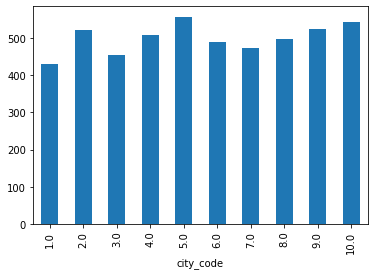

In [200]:
byCity = transaction_customer_prod.groupby(by=["city_code"]).count()
byCity['transaction_id'].plot.bar()

#### Customer-Transaction Frequency By Gander

In [ ]:
byGender = transaction_customer_prod.groupby(by=["Gender"]).count()
female = byGender['transaction_id'][0]
male =  byGender['transaction_id'][1]

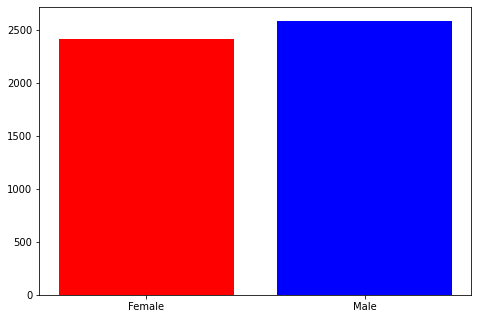

Gender
F    2412
M    2587
Name: transaction_id, dtype: int64

In [202]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Female', 'Male']
ax.bar(langs,[female, male], color=['red', 'blue'])
plt.show()
byGender['transaction_id']

#### Customer-Transaction Frequency By Product Category

In [203]:
byProdCategory = transaction_customer_prod.groupby(by=["prod_cat", "Gender"]).count()
byProdCategory['transaction_id']

prod_cat  Gender
Bags      F         1020
          M          970
Clothing  F         1392
          M         1617
Name: transaction_id, dtype: int64

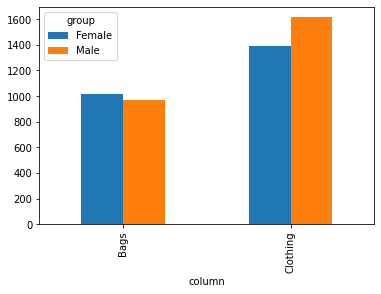

In [204]:
df = pd.DataFrame([['Female','Bags',byProdCategory['transaction_id'][0]],['Female','Clothing',byProdCategory['transaction_id'][2]],
                   ['Male  ','Bags',byProdCategory['transaction_id'][1]],['Male  ','Clothing',byProdCategory['transaction_id'][3]]],columns=['group','column','val'])

df.pivot("column", "group", "val").plot(kind='bar')

plt.show()

#### Customer-Transaction Frequency By Store type 

In [205]:
byQty = transaction_customer_prod.groupby(by=[  "prod_cat", "Store_type"]).count()
byQty['transaction_id']

prod_cat  Store_type    
Bags      Flagship store     392
          MBR                428
          TeleShop           394
          e-Shop             776
Clothing  Flagship store     600
          MBR                678
          TeleShop           546
          e-Shop            1191
Name: transaction_id, dtype: int64

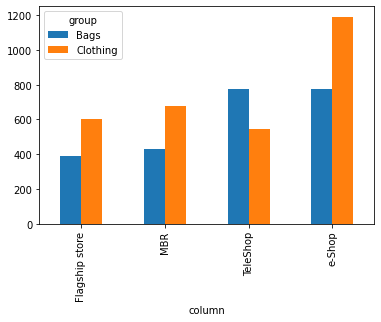

In [206]:
df = pd.DataFrame([ 
    ['Bags','Flagship store',byQty['transaction_id'][0]],['Bags','MBR',byQty['transaction_id'][1]], ['Bags','TeleShop',byQty['transaction_id'][3]],  ['Bags','e-Shop',byQty['transaction_id'][3]],
    ['Clothing','Flagship store',byQty['transaction_id'][4]],['Clothing','MBR',byQty['transaction_id'][5]], ['Clothing','TeleShop',byQty['transaction_id'][6]],  ['Clothing','e-Shop',byQty['transaction_id'][7]],

    ] ,columns=['group','column','val'])

df.pivot("column", "group", "val").plot(kind='bar')

plt.show()

### Customer-Transaction Frequency by total_amt

In [207]:
byAmount = transaction_customer_prod.groupby(by=["prod_cat", "prod_subcat", "Store_type"]).sum("total_amt")
byAmount['total_amt']

prod_cat  prod_subcat  Store_type    
Bags      Mens         Flagship store    445273.010
                       MBR               430938.950
                       TeleShop          339342.185
                       e-Shop            784397.510
          Women        Flagship store    445273.010
                       MBR               430938.950
                       TeleShop          339342.185
                       e-Shop            784397.510
Clothing  Kids         Flagship store    397995.585
                       MBR               489769.150
                       TeleShop          437290.490
                       e-Shop            757091.855
          Mens         Flagship store    397995.585
                       MBR               489769.150
                       TeleShop          437290.490
                       e-Shop            757091.855
          Women        Flagship store    397995.585
                       MBR               489769.150
                       Tel

### Month analysis

In [246]:
transaction_customer_prod['month'] = pd.DatetimeIndex(transaction_customer_prod['tran_date']).month
byDate = transaction_customer_prod.groupby(by=[ "month", "prod_cat"]).count()
byDate["transaction_id"]

month  prod_cat
1      Bags        164
       Clothing    309
2      Bags        158
       Clothing    222
3      Bags        180
       Clothing    252
4      Bags        168
       Clothing    201
5      Bags        164
       Clothing    243
6      Bags        182
       Clothing    225
7      Bags        176
       Clothing    246
8      Bags        156
       Clothing    255
9      Bags        170
       Clothing    252
10     Bags        154
       Clothing    324
11     Bags        168
       Clothing    270
12     Bags        150
       Clothing    216
Name: transaction_id, dtype: int64

<AxesSubplot:xlabel='month'>

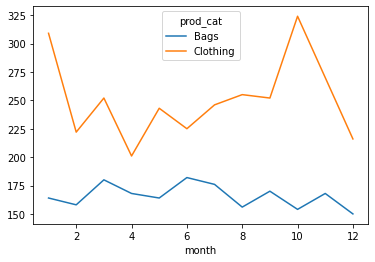

In [245]:
byDate["transaction_id"].unstack().plot()

## General Assumption for Recomendation
Based on our data exploration, there are several conclusions, including:
1. The distribution of transactions to locations (city_code) tends to be evenly distributed across each location. Thus, users from various locations have the same value for make the transactions.
2. The distribution by gender (male and female) has almost the same proportion, which is at 2587 and 2412.
3. Men tend to buy clothes compared to women. Meanwhile, **women are more likely to buy bags than clothes**.
4. **E-shop is the type of store** that is most widely used for transactions for both women and men.
5. In general, the transaction rate for **clothes is higher than bags** every month